In [1]:
# !KERAS_BACKEND=tensorflow python -c "from keras import backend"

from keras.models import load_model 

model= load_model('poverty_pred_VGG19_4.h5')


Using TensorFlow backend.


In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/aind2/Poverty_prediciton/Collection_figures/figures 6/'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'valid')

test_datagen = ImageDataGenerator(rescale=1./255)


In [3]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(244, 244),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test accuracy: %.2f%%' % test_acc)


Found 1000 images belonging to 3 classes.
Test accuracy: 0.62%


In [ ]:

print (len(np.argmax(prediction, axis=1)))

In [4]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob


# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 3)
    return files, targets

# load train, test, and validation datasets
test_files, test_targets = load_dataset('/home/aind2/Poverty_prediciton/Collection_figures/figures 6/valid')



print (len(np.argmax(test_targets, axis=1)))
# print (len(np.argmax(prediction, axis=1)))

1000


In [5]:
# prediction = model.predict_generator(test_generator,50)
# pred = model.predict(test_generator)

from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(244, 244))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


test_tensors = paths_to_tensor(test_files).astype('float32')/255





# prediction[prediction>=0.7] = 1
# prediction[prediction<0.5] = 0
# test_generator

100%|██████████| 1000/1000 [00:04<00:00, 210.70it/s]


In [6]:
predictions = [(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

predictions

[array([[ 0.1673163 ,  0.261933  ,  0.57075065]], dtype=float32),
 array([[  2.20998175e-37,   1.00000000e+00,   5.25044842e-38]], dtype=float32),
 array([[ 1.,  0.,  0.]], dtype=float32),
 array([[ 0.02756157,  0.94770831,  0.02473013]], dtype=float32),
 array([[ 0.07583874,  0.41820696,  0.50595427]], dtype=float32),
 array([[ 0.77517909,  0.03310823,  0.19171268]], dtype=float32),
 array([[ 1.,  0.,  0.]], dtype=float32),
 array([[  9.99244213e-01,   7.36750779e-04,   1.90143019e-05]], dtype=float32),
 array([[  9.99985695e-01,   4.03458706e-08,   1.43317902e-05]], dtype=float32),
 array([[ 0.03500082,  0.32187518,  0.64312398]], dtype=float32),
 array([[ 0.27512673,  0.58405995,  0.14081326]], dtype=float32),
 array([[ 0.55517238,  0.10251583,  0.3423118 ]], dtype=float32),
 array([[ 0.54341227,  0.01384975,  0.44273803]], dtype=float32),
 array([[ 0.02939982,  0.75161189,  0.21898833]], dtype=float32),
 array([[  1.35107994e-05,   9.91950750e-01,   8.03581998e-03]], dtype=float32)

In [7]:
predictions = np.squeeze(predictions)

predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0




In [29]:
# # test_targets

# import pandas as pd

# df = pd.DataFrame({'Col1':test_targets[:,0],'Col2':test_targets[:,1],'Col3':test_targets[:,2]})

# df.Col2.replace([0, 1], [0, 2.0],  inplace=True)
# df.Col3.replace([0, 1], [0, 3.0],  inplace=True)
# df.head()
# y_train = list(df.sum(axis = 1))

# y_train =[7 if x==1.0 else x for x in y_train]
# y_train =[8 if x==2.0 else x for x in y_train]
# y_train = [9 if x==3.0 else x for x in y_train]

# y_train

# y_train = [0 if x==7 else x for x in y_train]
# y_train = [1 if x==8 else x for x in y_train]
# y_train = [2 if x==9 else x for x in y_train]

# y_train

In [8]:
from sklearn.metrics import  confusion_matrix
CM = confusion_matrix((np.argmax(test_targets, axis=1)),(np.argmax(predictions, axis=1)))
# print (CM )

Normalized confusion matrix
[[ 0.82  0.09  0.09]
 [ 0.23  0.57  0.19]
 [ 0.4   0.34  0.26]]


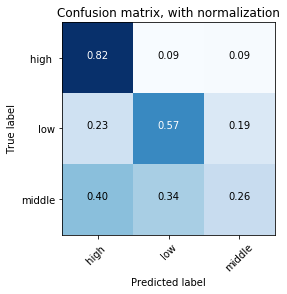

In [9]:
import matplotlib.pyplot as plt
import itertools

names=['high ','low','middle']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(CM, classes=names,normalize=True,
                      title='Confusion matrix, with normalization')

plt.show()

In [ ]:
len(test_targets[0])

In [16]:
from sklearn.metrics import f1_score
f1_score((np.argmax(test_targets, axis=1)),(np.argmax(predictions, axis=1)), average='micro')

0.60099999999999998